## Classification with Python

### Imports

In [100]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
import random
import disarray

### Mushroom Decision Tree

I modified the Mushroom dataset to be a xlsx because there were way too many different inputs and I couldn't find one that would make the process easier to us.
Here's the download link for the xls version : https://docs.google.com/spreadsheets/d/1SrkBzu4FxGNXaMYn7NFx7PTjc8VA6N4c3Cua8HEsYyc/edit?usp=sharing

In [31]:
classes = [u'Comestible',u'Non Comestible']
data = pd.read_csv('data/Mushroom.csv', encoding='utf-8')
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

In [70]:
tree.export_graphviz(dtree, out_file="dot/mushroom.dot", feature_names=X.columns, class_names=classes)

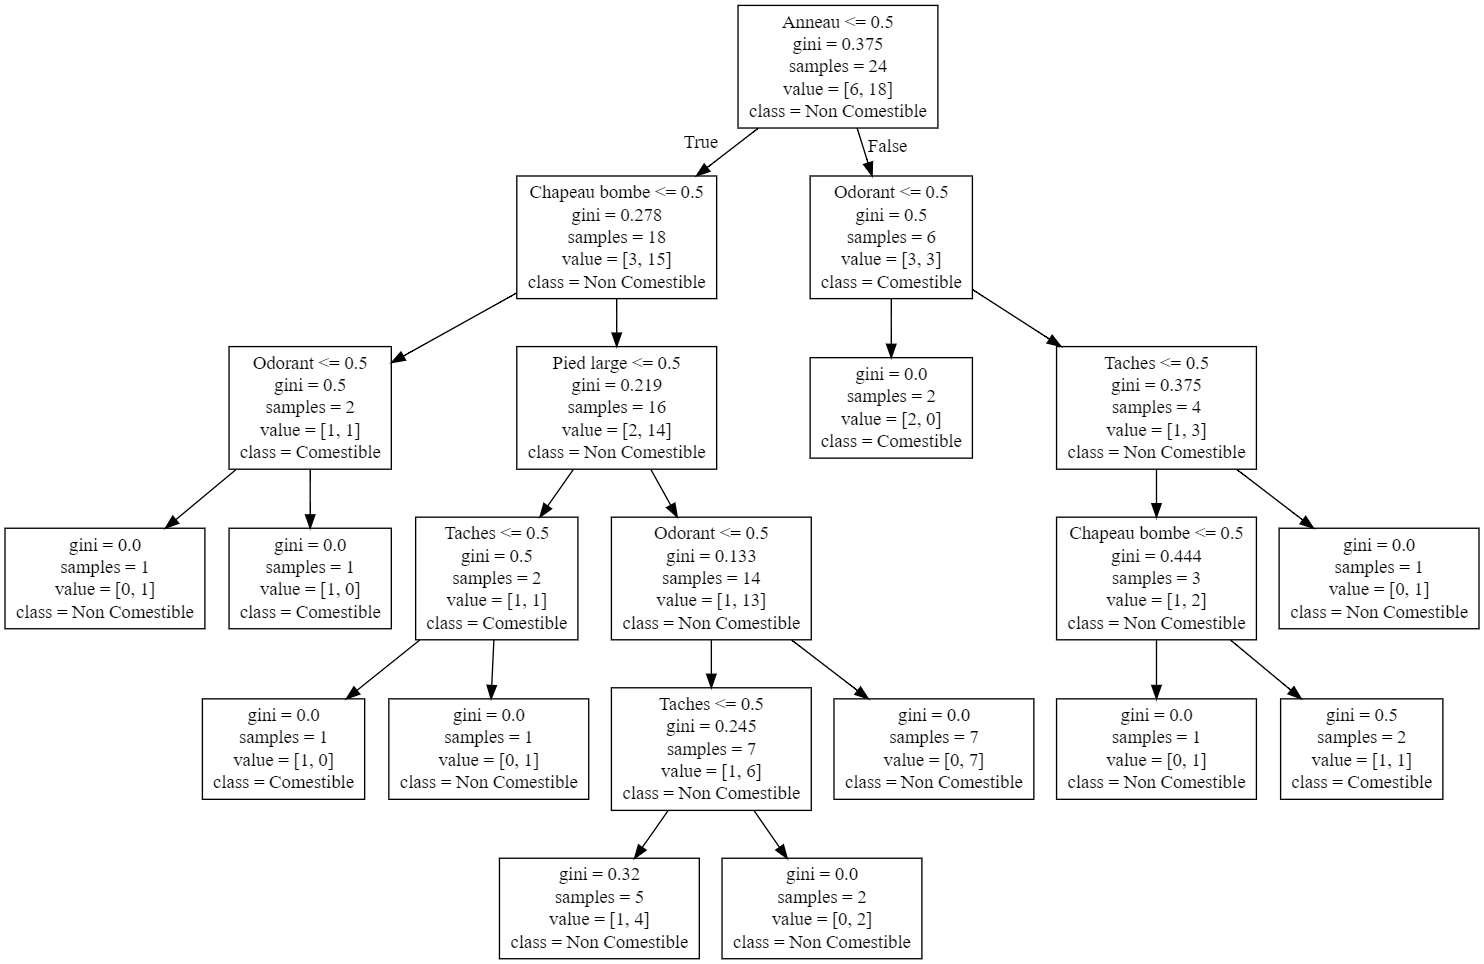

In [71]:
display(Image(filename='images/mushroom.png'))

## Weather Decision Tree

In [112]:
classes = ['Umbrella','No umbrella']
data = pd.read_excel('data/Meteo.xls').replace({True : 1, False : 0, 'high' : 1, 'normal' : 0, 'N' : 0, 'P' : 1})
data = pd.get_dummies(data,  columns=["Tempreature", "Outlook"])
X = data.iloc[:,1:-1]
Y = data.iloc[:,-1]

dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

In [117]:
tree.export_graphviz(dtree, out_file="dot/meteo.dot", feature_names=X.columns, class_names=classes)

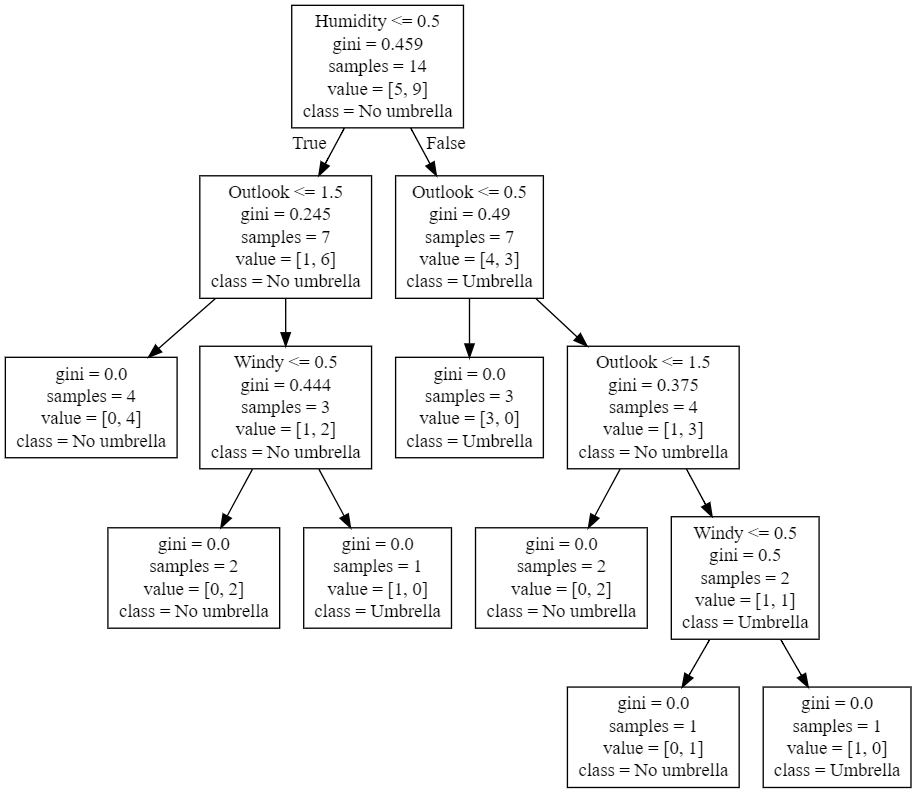

In [118]:
display(Image(filename='images/meteo.png'))

### Some comparison on the Iris dataset 

#### Decision Tree Classification

In [151]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)
Y = pd.DataFrame(iris.target)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
classes = iris.target_names

In [152]:
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

In [153]:
tree.export_graphviz(dtree, out_file="dot/iris.dot", feature_names=features, class_names=classes)

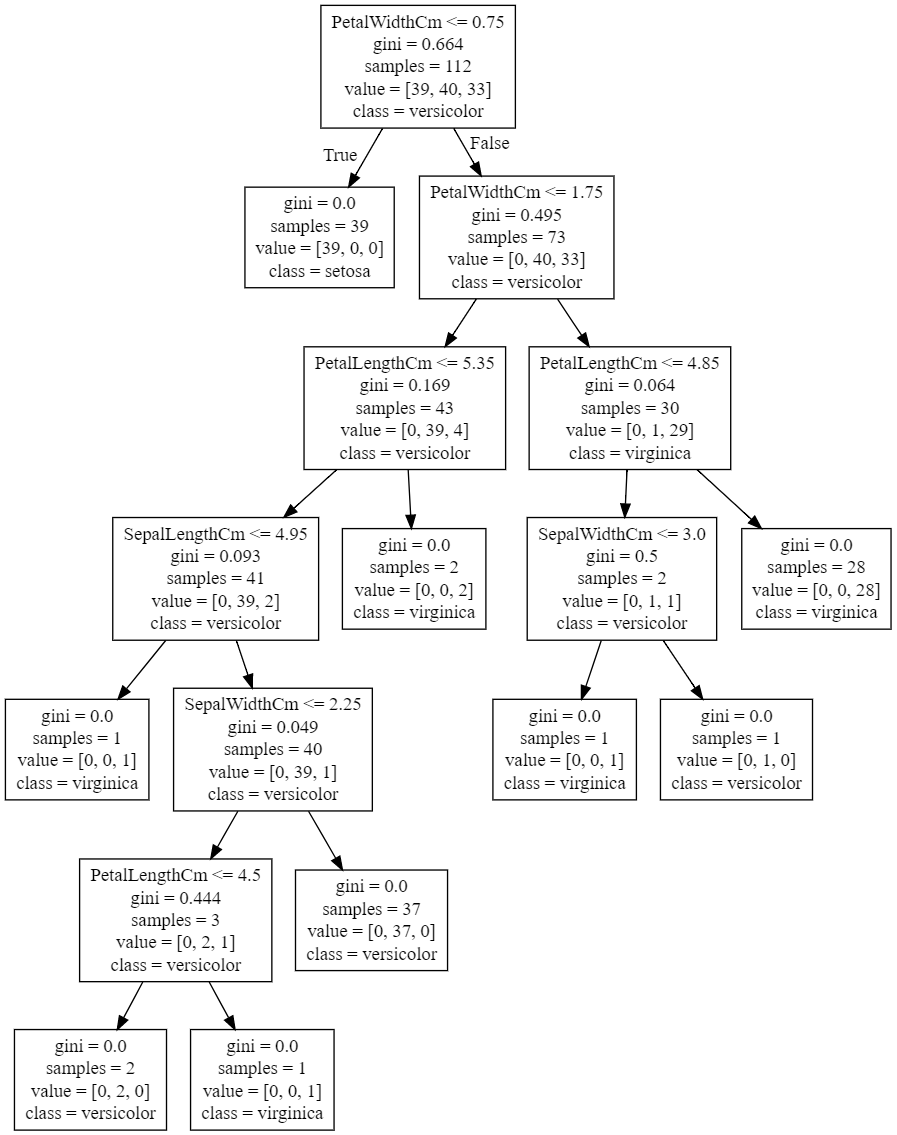

In [154]:
display(Image(filename='images/iris.png'))

In [155]:
def get_metrics(conf): # Compute the generic metrics from the confusion matrix fro each class in the matrix
    # Computing indicators sub-terms
    return pd.DataFrame(conf).da.export_metrics()

In [156]:
Y_pred = dtree.predict(X_test)
conf_ = confusion_matrix(Y_test, Y_pred).astype(int)
get_metrics(conf_)

,0,1,2,micro-average
accuracy,1.0,0.868421,0.868421,0.912281
f1,1.0,0.827586,0.705882,0.868421
false_discovery_rate,0.0,0.250000,0.142857,0.131579
false_negative_rate,0.0,0.076923,0.400000,0.131579
false_positive_rate,0.0,0.160000,0.035714,0.065789
negative_predictive_value,1.0,0.954545,0.870968,0.934211
positive_predictive_value,1.0,0.750000,0.857143,0.868421
precision,1.0,0.750000,0.857143,0.868421
recall,1.0,0.923077,0.600000,0.868421
sensitivity,1.0,0.923077,0.600000,0.868421


We can see that the first class is clearly well predicted but both second and third class are 0.912...

It means that the model is able to correctly classify 947 out of 1000 times (rounded values)

#### Random Forest Classification

In [135]:
rf = AdaBoostClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, np.ravel(Y_train))

AdaBoostClassifier(n_estimators=100, random_state=0)

In [136]:
Y_pred = rf.predict(X_test)

rf_conf = confusion_matrix(Y_test, Y_pred).astype(int)
get_metrics(rf_conf)

,0,1,2,micro-average
accuracy,1.0,0.947368,0.947368,0.964912
f1,1.0,0.933333,0.909091,0.947368
false_discovery_rate,0.0,0.125000,0.000000,0.052632
false_negative_rate,0.0,0.000000,0.166667,0.052632
false_positive_rate,0.0,0.083333,0.000000,0.026316
negative_predictive_value,1.0,1.000000,0.928571,0.973684
positive_predictive_value,1.0,0.875000,1.000000,0.947368
precision,1.0,0.875000,1.000000,0.947368
recall,1.0,1.000000,0.833333,0.947368
sensitivity,1.0,1.000000,0.833333,0.947368


We can see that the first class is clearly well predicted but both second and third class are 0.947...

It means that the model is able to correctly classify 964 out of 1000 times (rounded values)

The prediction is then better than the decision tree.

#### AdaBoost Classification

In [137]:
ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, np.ravel(Y_train))

AdaBoostClassifier(n_estimators=100, random_state=0)

In [138]:
Y_pred = ada.predict(X_test)

ada_conf = confusion_matrix(Y_test, Y_pred).astype(int)
get_metrics(ada_conf)

,0,1,2,micro-average
accuracy,1.0,0.947368,0.947368,0.964912
f1,1.0,0.933333,0.909091,0.947368
false_discovery_rate,0.0,0.125000,0.000000,0.052632
false_negative_rate,0.0,0.000000,0.166667,0.052632
false_positive_rate,0.0,0.083333,0.000000,0.026316
negative_predictive_value,1.0,1.000000,0.928571,0.973684
positive_predictive_value,1.0,0.875000,1.000000,0.947368
precision,1.0,0.875000,1.000000,0.947368
recall,1.0,1.000000,0.833333,0.947368
sensitivity,1.0,1.000000,0.833333,0.947368


We can see that the first class is clearly well predicted but both second and third class are 0.947...

It means that the model is able to correctly classify 964 out of 1000 times (rounded values)

The prediction is then better than the decision tree.